In [1]:
from CDF_snake import CDFSnake
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
def pdf(x, conditional):
    y = x.copy()
    y[x >= conditional] = 0
    return y

In [3]:
xgrid = np.linspace(0.1, 10, 500)
pdfs = np.array([pdf(xgrid, x) for x in xgrid[50::100]]).T

In [4]:
cdf_snake = CDFSnake(xgrid, pdfs, normalise_cdfs=True, use_gpu=False, cache_cdfs=True)

3.0184531398790115


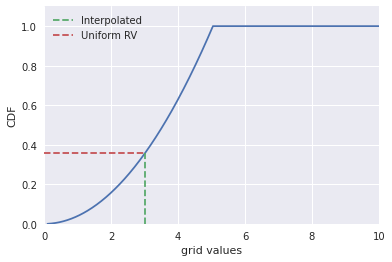

In [5]:
plt.plot(cdf_snake.grid_values, cdf_snake.cdfs[:,2])
rnum = np.random.uniform(0,1)
sample = np.interp(rnum, cdf_snake.cdfs[:,2], cdf_snake.grid_values)
plt.plot([sample,sample], [0,rnum], ls='--', label='Interpolated')
print(sample)
plt.plot([0,sample],[rnum, rnum], ls='--', label='Uniform RV')
plt.xlim(0,10)
plt.ylim(0,1.1)
plt.legend()
plt.xlabel('grid values')
plt.ylabel('CDF')
plt.show()

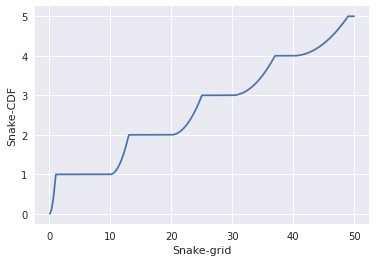

In [6]:
plt.plot(cdf_snake.grid_snake, cdf_snake.cdf_snake)
plt.xlabel('Snake-grid')
plt.ylabel('Snake-CDF')
plt.show()

In [7]:
samples = cdf_snake.sample_snake()

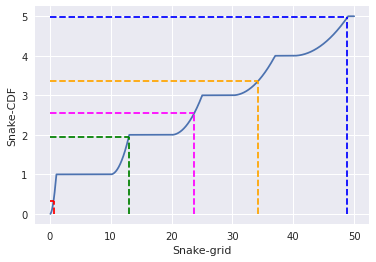

In [8]:
plt.plot(cdf_snake.grid_snake, cdf_snake.cdf_snake)
for sample, rnum, col in zip(samples + cdf_snake.max_grid_value*cdf_snake.arange, cdf_snake.random_sample_snake, ['r','g','magenta','orange','blue']):
    plt.plot([sample,sample], [0,rnum], ls='--', label='Interpolated', color=col)
    plt.plot([0,sample],[rnum, rnum], ls='--', label='Uniform RV', color=col)
plt.xlabel('Snake-grid')
plt.ylabel('Snake-CDF')
plt.show()

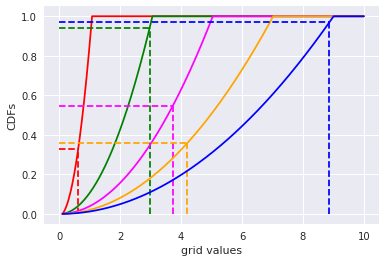

In [9]:
for sample, rnum, col, cdf, in zip(samples, (cdf_snake.random_sample_snake - cdf_snake.arange), ['r','g','magenta','orange','blue'], cdf_snake.cdfs.T):
    plt.plot(cdf_snake.grid_values, cdf, color=col)
    plt.plot([sample,sample], [0,rnum], ls='--', label='Interpolated', color=col)
    plt.plot([0,sample],[rnum, rnum], ls='--', label='Uniform RV', color=col)
plt.xlabel('grid values')
plt.ylabel('CDFs')
plt.show()

In [10]:
cdf_snake_gpu = CDFSnake(xgrid, pdfs, normalise_cdfs=True, use_gpu=True, cache_cdfs=True)